# 2.Use sua implementação de split_k_fold a fim de fazer Cross Validation com k=5 (5-Fold) para obter o MSE de regressões para o seguinte dataset sobre a qualidade de vinhos tintos (winequality-red.csv) (para obter detalhes sobre o dataset clique aqui). Compare as seguintes técnicas de regressão (pode usar as implementações do Scikit Learn):

    SGD - Stochastic Gradient Descent Regressor
    Linear Regression 
    Linear SVR
    SVR - Epsilon-Support Vector Regression
    Random Forest Regressor
    Gradient Boosting Regressor

In [2]:
import resample as rs
import numpy as np
from sklearn import linear_model
from sklearn import metrics as ms
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
dado = np.genfromtxt("datasets/winequality-red.csv", delimiter=";", skip_header=1)

In [4]:
dado.shape

(1599, 12)

In [5]:
idx_train, idx_test = rs.split_k_fold(dado.shape[0], 5, True, 0)

In [7]:
X = dado[:, 0]
y = dado[:, 1]

X,y

(array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ]),
 array([0.7  , 0.88 , 0.76 , ..., 0.51 , 0.645, 0.31 ]))

In [10]:
X_train = []
y_train = []
X_test = []
y_test = []

X_train_1 = []
y_train_1 = []
X_test_1 = []
y_test_1 = []


for i in range(len(idx_train)):
    X_train.append(X[idx_train[i]])
    y_train.append(y[idx_train[i]])
    
for i in range(len(idx_test)):
    X_test.append(X[idx_test[i]])
    y_test.append(y[idx_test[i]])

#vetor 2d
for i in range(len(idx_train)):
    X_train_1.append([[i] for i in X_train[i]])
    y_train_1.append([[i] for i in y_train[i]])

for i in range(len(idx_test)):
    X_test_1.append([[i] for i in X_test[i]])
    y_test_1.append([[i] for i in y_test[i]])

[array([0.32, 0.54, 0.26, ..., 0.57, 0.47, 0.98]),
 array([0.4  , 0.24 , 0.56 , ..., 0.39 , 0.34 , 0.765]),
 array([0.715, 0.41 , 0.59 , ..., 0.46 , 0.785, 0.31 ]),
 array([0.835, 0.49 , 0.44 , ..., 0.59 , 0.46 , 0.64 ]),
 array([0.665, 0.57 , 0.47 , ..., 0.61 , 0.27 , 0.4  ])]

In [7]:
model_SGD_1 = linear_model.SGDRegressor()
model_SGD_2 = linear_model.SGDRegressor()
model_SGD_3 = linear_model.SGDRegressor()
model_SGD_4 = linear_model.SGDRegressor()
model_SGD_5 = linear_model.SGDRegressor()

### SGD - Stochastic Gradient Descent Regressor

In [8]:
#modelo 1
model_SGD_1.fit(X_train_1[0], y_train_1[0])
y_pred_SGD_1 = model_SGD_1.predict(X_test_1[0])
sgd_mse_1 = ms.mean_squared_error(y_test_1[0], y_pred_SGD_1)

#modelo 2
model_SGD_2.fit(X_train_1[1], y_train_1[1])
y_pred_SGD_2 = model_SGD_2.predict(X_test_1[1])
sgd_mse_2 = ms.mean_squared_error(y_test_1[1], y_pred_SGD_2)

#modelo 3
model_SGD_3.fit(X_train_1[2], y_train_1[2])
y_pred_SGD_3 = model_SGD_3.predict(X_test_1[2])
sgd_mse_3 = ms.mean_squared_error(y_test_1[2], y_pred_SGD_3)

#modelo 4
model_SGD_4.fit(X_train_1[3], y_train_1[3])
y_pred_SGD_4 = model_SGD_4.predict(X_test_1[3])
sgd_mse_4 = ms.mean_squared_error(y_test_1[3], y_pred_SGD_4)

#modelo 5
model_SGD_5.fit(X_train_1[4], y_train_1[4])
y_pred_SGD_5 = model_SGD_5.predict(X_test_1[4])
sgd_mse_5 = ms.mean_squared_error(y_test_1[4], y_pred_SGD_5)

perf_SGD = ((sgd_mse_1 + sgd_mse_2 + sgd_mse_3 + sgd_mse_4 + sgd_mse_5) / 5)
perf_SGD

0.044315320602397734

### Linear Regression 

In [9]:
model_lr_1 = linear_model.LinearRegression()
model_lr_2 = linear_model.LinearRegression()
model_lr_3 = linear_model.LinearRegression()
model_lr_4 = linear_model.LinearRegression()
model_lr_5 = linear_model.LinearRegression()

In [10]:
model_lr_1.fit(X_train_1[0], y_train_1[0])
y_pred_lr_1 = model_lr_1.predict(X_test_1[0])
lr_mse_1 = ms.mean_squared_error(y_test_1[0], y_pred_lr_1)

model_lr_2.fit(X_train_1[1], y_train_1[1])
y_pred_lr_2 = model_lr_2.predict(X_test_1[1])
lr_mse_2 = ms.mean_squared_error(y_test_1[1], y_pred_lr_2)

model_lr_3.fit(X_train_1[2], y_train_1[2])
y_pred_lr_3 = model_lr_3.predict(X_test_1[2])
lr_mse_3 = ms.mean_squared_error(y_test_1[2], y_pred_lr_3)

model_lr_4.fit(X_train_1[3], y_train_1[3])
y_pred_lr_4 = model_lr_4.predict(X_test_1[3])
lr_mse_4 = ms.mean_squared_error(y_test_1[3], y_pred_lr_4)

model_lr_5.fit(X_train_1[4], y_train_1[4])
y_pred_lr_5 = model_lr_5.predict(X_test_1[4])
lr_mse_5 = ms.mean_squared_error(y_test_1[4], y_pred_lr_5)

In [11]:
perf_lr = ((lr_mse_1 + lr_mse_2 + lr_mse_3 + lr_mse_4 + lr_mse_5) / 5)
perf_lr

0.029930497034959563

### Linear SVR

In [12]:
model_lsvr_1 = LinearSVR()
model_lsvr_2 = LinearSVR()
model_lsvr_3 = LinearSVR()
model_lsvr_4 = LinearSVR()
model_lsvr_5 = LinearSVR()

In [13]:
model_lsvr_1.fit(X_train_1[0], y_train_1[0])
y_pred_lsvr_1 = model_lsvr_1.predict(X_test_1[0])
lsvr_mse_1 = ms.mean_squared_error(y_test_1[0], y_pred_lsvr_1)

model_lsvr_2.fit(X_train_1[1], y_train_1[1])
y_pred_lsvr_2 = model_lsvr_2.predict(X_test_1[1])
lsvr_mse_2 = ms.mean_squared_error(y_test_1[1], y_pred_lsvr_2)

model_lsvr_3.fit(X_train_1[2], y_train_1[2])
y_pred_lsvr_3 = model_lsvr_3.predict(X_test_1[2])
lsvr_mse_3 = ms.mean_squared_error(y_test_1[2], y_pred_lsvr_3)

model_lsvr_4.fit(X_train_1[3], y_train_1[3])
y_pred_lsvr_4 = model_lsvr_4.predict(X_test_1[3])
lsvr_mse_4 = ms.mean_squared_error(y_test_1[3], y_pred_lsvr_4)

model_lsvr_5.fit(X_train_1[4], y_train_1[4])
y_pred_lsvr_5 = model_lsvr_5.predict(X_test_1[4])
lsvr_mse_5 = ms.mean_squared_error(y_test_1[4], y_pred_lsvr_5)

In [14]:
perf_lsvr = ((lsvr_mse_1 + lsvr_mse_2 + lsvr_mse_3 + lsvr_mse_4 + lsvr_mse_5) / 5)
perf_lsvr

0.031702333287014196

### SVR - Epsilon-Support Vector Regression

In [16]:
model_svr_1 = SVR()
model_svr_2 = SVR()
model_svr_3 = SVR()
model_svr_4 = SVR()
model_svr_5 = SVR()

In [18]:
model_svr_1.fit(X_train_1[0], y_train_1[0])
y_pred_svr_1 = model_svr_1.predict(X_test_1[0])
svr_mse_1 = ms.mean_squared_error(y_test_1[0], y_pred_svr_1)

model_svr_2.fit(X_train_1[1], y_train_1[1])
y_pred_svr_2 = model_svr_2.predict(X_test_1[1])
svr_mse_2 = ms.mean_squared_error(y_test_1[1], y_pred_svr_2)

model_svr_3.fit(X_train_1[2], y_train_1[2])
y_pred_svr_3 = model_svr_3.predict(X_test_1[2])
svr_mse_3 = ms.mean_squared_error(y_test_1[2], y_pred_svr_3)

model_svr_4.fit(X_train_1[3], y_train_1[3])
y_pred_svr_4 = model_svr_4.predict(X_test_1[3])
svr_mse_4 = ms.mean_squared_error(y_test_1[3], y_pred_svr_4)

model_svr_5.fit(X_train_1[4], y_train_1[4])
y_pred_svr_5 = model_svr_5.predict(X_test_1[4])
svr_mse_5 = ms.mean_squared_error(y_test_1[4], y_pred_svr_5)

In [19]:
perf_svr = ((svr_mse_1 + svr_mse_2 + svr_mse_3 + svr_mse_4 + svr_mse_5) / 5)
perf_svr

0.029742411488478983

### Random Forest Regressor

In [22]:
model_rfr_1 = RandomForestRegressor()
model_rfr_2 = RandomForestRegressor()
model_rfr_3 = RandomForestRegressor()
model_rfr_4 = RandomForestRegressor()
model_rfr_5 = RandomForestRegressor()

In [24]:
model_rfr_1.fit(X_train_1[0], y_train_1[0])
y_pred_rfr_1 = model_rfr_1.predict(X_test_1[0])
rfr_mse_1 = ms.mean_squared_error(y_test_1[0], y_pred_rfr_1)

model_rfr_2.fit(X_train_1[1], y_train_1[1])
y_pred_rfr_2 = model_rfr_2.predict(X_test_1[1])
rfr_mse_2 = ms.mean_squared_error(y_test_1[1], y_pred_rfr_2)

model_rfr_3.fit(X_train_1[2], y_train_1[2])
y_pred_rfr_3 = model_rfr_3.predict(X_test_1[2])
rfr_mse_3 = ms.mean_squared_error(y_test_1[2], y_pred_rfr_3)

model_rfr_4.fit(X_train_1[3], y_train_1[3])
y_pred_rfr_4 = model_rfr_4.predict(X_test_1[3])
rfr_mse_4 = ms.mean_squared_error(y_test_1[3], y_pred_rfr_4)

model_rfr_5.fit(X_train_1[4], y_train_1[4])
y_pred_rfr_5 = model_rfr_5.predict(X_test_1[4])
rfr_mse_5 = ms.mean_squared_error(y_test_1[4], y_pred_rfr_5)

In [26]:
perf_rfr = (rfr_mse_1 + rfr_mse_2 + rfr_mse_3 + rfr_mse_4 + rfr_mse_5) / 5
perf_rfr

0.030161102997754857

### Gradient Boosting Regressor

In [28]:
model_gbr_1 = GradientBoostingRegressor()
model_gbr_2 = GradientBoostingRegressor()
model_gbr_3 = GradientBoostingRegressor()
model_gbr_4 = GradientBoostingRegressor()
model_gbr_5 = GradientBoostingRegressor()

In [29]:
model_gbr_1.fit(X_train_1[0], y_train_1[0])
y_pred_gbr_1 = model_gbr_1.predict(X_test_1[0])
gbr_mse_1 = ms.mean_squared_error(y_test_1[0], y_pred_gbr_1)

model_gbr_2.fit(X_train_1[1], y_train_1[1])
y_pred_gbr_2 = model_gbr_2.predict(X_test_1[1])
gbr_mse_2 = ms.mean_squared_error(y_test_1[1], y_pred_gbr_2)

model_gbr_3.fit(X_train_1[2], y_train_1[2])
y_pred_gbr_3 = model_gbr_3.predict(X_test_1[2])
gbr_mse_3 = ms.mean_squared_error(y_test_1[2], y_pred_gbr_3)

model_gbr_4.fit(X_train_1[3], y_train_1[3])
y_pred_gbr_4 = model_gbr_4.predict(X_test_1[3])
gbr_mse_4 = ms.mean_squared_error(y_test_1[3], y_pred_gbr_4)

model_gbr_5.fit(X_train_1[4], y_train_1[4])
y_pred_gbr_5 = model_gbr_5.predict(X_test_1[4])
gbr_mse_5 = ms.mean_squared_error(y_test_1[4], y_pred_gbr_5)

In [30]:
perf_gbr = (gbr_mse_1 + gbr_mse_2 + gbr_mse_3 + gbr_mse_4 + gbr_mse_5) / 5
perf_gbr

0.029402170965826896

# 3. Faça um gráfico comparativo entre resultados das avaliações (Evaluation) dos modelos acima.

In [32]:
class_names = ['SGD','LR','LSVR','SVR','RFR','GBR']
class_ = [perf_SGD, perf_lr, perf_lsvr, perf_svr, perf_rfr, perf_gbr]
for i in range(0,len(class_names)):
    print(class_names[i] + ': ' + str(class_[i]))

SGD: 0.044315320602397734
LR: 0.029930497034959563
LSVR: 0.031702333287014196
SVR: 0.029742411488478983
RFR: 0.030161102997754857
GBR: 0.029402170965826896


([<matplotlib.axis.XTick at 0x7f64fcdb0b00>,
 <a list of 6 Text xticklabel objects>)

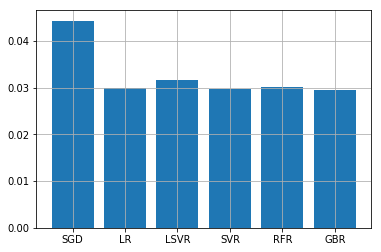

In [35]:
plt.grid()
plt.bar(range(len(class_names)),class_)
plt.xticks(range(len(class_names)), class_names)

# 4. Escolha o melhor algoritmo obtido a partir de cross validation e treine um modelo usando o dataset completo, ou seja, gere um modelo final.

In [38]:
X_fm = [[i] for i in X]
y_fm = [[i] for i in y]

model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_fm, y_fm)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

# 5. Qual a diferença entre Stochastic Gradient Descent e Gradient Descent?

### A diferença é que o Gradient Descent utiliza todos os dados de uma vez enquanto que o Stochastic Gradient Descent utiliza subconjuntos dos dados o que o deixa mais rápido com a única contrapartida de que sua função de erro não ser bem minimizada.